# Machine Learning Model Performance
Analysis of different ML models and their performance metrics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                         n_redundant=10, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Training set size: (800, 20)
Test set size: (200, 20)
Number of classes: 2


In [2]:
# Train different models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Create results DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
print("\nModel Comparison:")
print(results_df)


Random Forest Results:
Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.98      0.99      0.99       107

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200


Logistic Regression Results:
Accuracy: 0.9550

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        93
           1       0.96      0.95      0.96       107

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200


SVM Results:
Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.98      0.99      0.99   

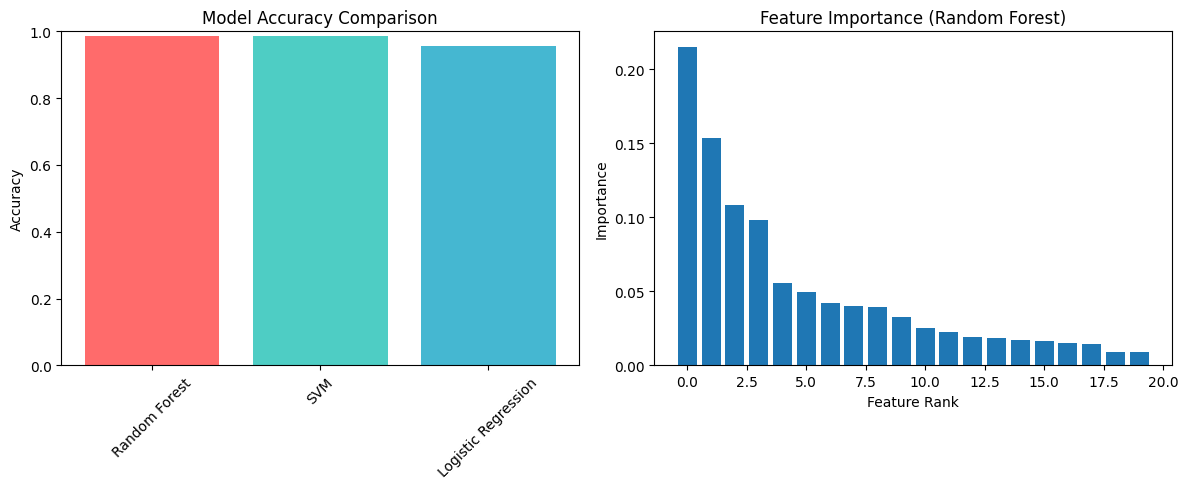

In [3]:
# Visualize model performance
plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['Accuracy'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Feature importance (Random Forest)
rf_model = models['Random Forest']
feature_importance = rf_model.feature_importances_
plt.subplot(1, 2, 2)
plt.bar(range(len(feature_importance)), sorted(feature_importance, reverse=True))
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature Rank')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()